In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import geemap,ee
import matplotlib.colors as colors
from shapely.geometry import shape, box
from matplotlib import colors
import matplotlib.patches as mpatches
import contextily as ctx
import os

# 1. Abriendo los datos

Analizamos el año más antiguo que tenemos para observar las migraciones.

In [8]:
paths = os.listdir('UngulateMig')
elk_routes_paths = [p for p in paths if 'WY' in p and 'shp' in p]

In [9]:
wy_ungulates = []
for p in elk_routes_paths:
    years = []
    path = os.path.join('UngulateMig', p)
    file = gpd.read_file(path)
    if 'year' in file.keys():
        print(p, '-', min(file['year']))
    wy_ungulates.append(path)


    

Elk_WY_ClarksFork_Routes_Ver1_2019.shp - 2007.0
Elk_WY_Cody_Routes_Ver1_2019.shp - 2014.0
Elk_WY_FossilButte_Routes_Ver1_2019.shp - 2005.0
Elk_WY_Jackson_Routes_Ver1_2019.shp - 2006.0
Elk_WY_Piney_Routes_Ver1_2019.shp - 2000.0
Elk_WY_SouthWindRiver_Routes_Ver1_2019.shp - 2008.0
MD_WY_ClarksFork_Routes_Ver1_2019.shp - 2016.0
MD_WY_Dubois_Routes_Ver1_2019.shp - 2016.0
MD_WY_OwlCreekMeeteetse_Routes_Ver1_2019.shp - 2016.0
MD_WY_SouthWindRiver_Routes_Ver1_2019.shp - 2012.0
MD_WY_WyomingRangeNorth_Routes_Ver1_2019.shp - 2013.0
MD_WY_WyomingRangeSouth_Routes_Ver1_2019.shp - 2013.0
Moose_WY_Jackson_Routes_Ver1_2019.shp - 2005.0
Moose_WY_Sublette_Routes_Ver1_2019.shp - 2011.0


In [10]:
ynp_path = os.path.join('YELL_tracts', 'YELL_tracts.shp')
ynp = gpd.read_file(ynp_path)

In [59]:
clarksfork_routes = gpd.read_file(wy_ungulates[0])
clarksfork_routes

,mig,firstdate,lastdate,id,season,year,geometry
0,1_fa07,2007-10-05 19:00:00,2007-11-21 16:00:00,1,fa,2007.0,"LINESTRING (-1104291 2498600, -1104300 2498869..."
1,1_fa08,2008-10-08 19:00:00,2008-11-02 16:00:00,1,fa,2008.0,"LINESTRING (-1102629 2497283, -1103098 2497300..."
2,1_fa09,2009-10-11 19:00:00,2009-11-06 16:00:00,1,fa,2009.0,"LINESTRING (-1106807 2500914, -1105809 2501583..."
3,10_fa07,2007-10-19 19:00:00,2007-12-01 16:00:00,10,fa,2007.0,"LINESTRING (-1104098 2515276, -1103961 2515351..."
4,10_fa08,2009-01-03 19:00:00,2009-01-18 16:00:00,10,fa,2008.0,"LINESTRING (-1110456 2513688, -1110367 2513671..."
...,...,...,...,...,...,...,...
103,70_sp08,2008-05-31 21:00:00,2008-06-30 15:00:00,70,sp,2008.0,"LINESTRING (-1071986 2493009, -1071855 2493190..."
104,8_fa07,2007-10-03 19:00:00,2007-12-26 16:00:00,8,fa,2007.0,"LINESTRING (-1087008 2512933, -1086736 2512537..."
105,8_fa08,2008-08-14 20:00:00,2008-09-29 11:00:00,8,fa,2008.0,"LINESTRING (-1102040 2515915, -1101927 2515983..."
106,8_fa09,2009-08-05 20:00:00,2009-10-11 11:00:00,8,fa,2009.0,"LINESTRING (-1092176 2517512, -1092171 2517494..."


Podemos ver que tenemos acceso a varias migraciones a lo largo de los años.

In [60]:
clarksfork_routes = clarksfork_routes.to_crs(ynp.crs)

<Axes: >

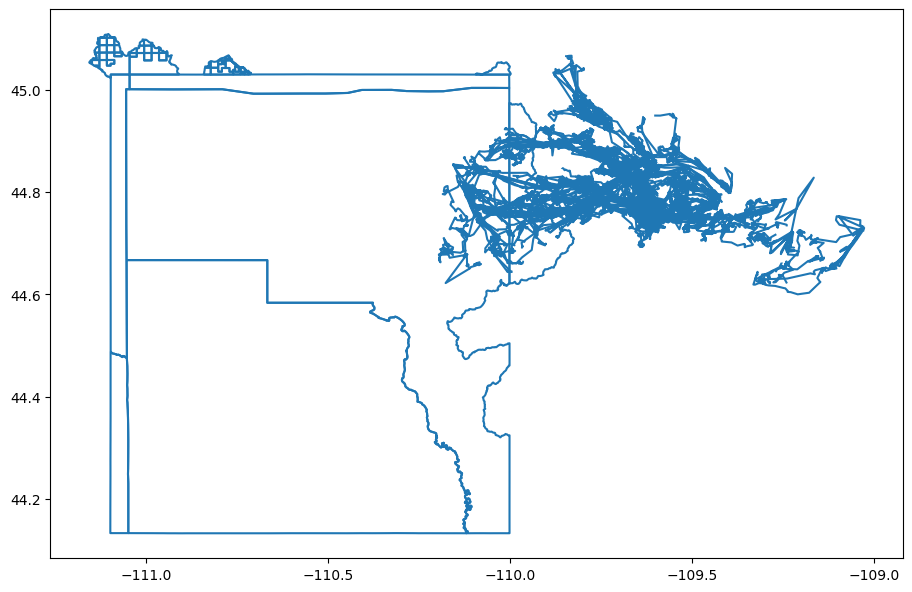

In [61]:
fig, ax = plt.subplots(figsize=[11, 11])
clarksfork_routes.plot(ax=ax)
ynp.boundary.plot(ax=ax)

El trabajo para más adelante será encontrar todas las migraciones que intersecten al parque de Yellowstone.